# Solar forecast

## Load necessary packages and pre-define functions

In [329]:
#!pip install pandas
#!pip install matplotlib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [330]:
#pip install requests
import requests
import json
import pytz
from datetime import datetime, timedelta
import calendar

In [331]:
SOLAR_PATH = 'solar_forecast'
SOLAR_PATH = ''

In [332]:
pwd

'C:\\Users\\MarcH\\OneDrive\\Documenten\\Professional development\\solar_forecast'

In [333]:
# load csv
def load_solar_data(csvname, solar_path=SOLAR_PATH, sep=","):
        csv_path = os.path.join(solar_path, csvname)
        return pd.read_csv(csv_path, sep=sep)

## Load solar data

In [334]:
solgain_raw=load_solar_data('vermogen_n2.csv', sep=';')

In [335]:
solgain_raw.head(40)

,Unnamed: 0,time,value
0,0,2024-07-29T00:08:08.530350Z,0.0
1,1,2024-07-29T00:48:08.529554Z,0.0
2,2,2024-07-29T01:18:08.548285Z,0.0
3,3,2024-07-29T01:48:08.522938Z,0.0
4,4,2024-07-29T02:48:08.621637Z,0.0
5,5,2024-07-29T03:08:08.542047Z,0.3
6,6,2024-07-29T03:38:39.917186Z,0.1
7,7,2024-07-29T03:48:08.560356Z,0.3
8,8,2024-07-29T04:08:08.546396Z,1.6
9,9,2024-07-29T04:48:08.519784Z,1.6


In [336]:
solgain_raw.describe()

,Unnamed: 0,value
count,84342.000000,84342.000000
mean,42170.500000,12.505820
std,24347.582539,11.269096
min,0.000000,0.000000
25%,21085.250000,2.500000
50%,42170.500000,9.800000
75%,63255.750000,20.100000
max,84341.000000,48.100000


In [337]:
solgain_raw.size

253026

## Preprocess the data

### Mean values per hour (to the next hour)

In [338]:
solgain_raw['time'] = pd.to_datetime(solgain_raw['time']) #, format='%d%b%Y:%H:%M:%S.%f'

In [339]:
solgain_raw['time']

0       2024-07-29 00:08:08.530350+00:00
1       2024-07-29 00:48:08.529554+00:00
2       2024-07-29 01:18:08.548285+00:00
3       2024-07-29 01:48:08.522938+00:00
4       2024-07-29 02:48:08.621637+00:00
                      ...               
84337   2025-07-31 21:13:35.780826+00:00
84338   2025-07-31 21:22:25.140885+00:00
84339   2025-07-31 21:33:35.585447+00:00
84340   2025-07-31 22:03:35.589347+00:00
84341   2025-07-31 23:13:35.585117+00:00
Name: time, Length: 84342, dtype: datetime64[ns, UTC]

In [340]:
solgain_agg_raw=solgain_raw.groupby((solgain_raw.time.dt.year-2024)*(365 + calendar.isleap(datetime.now().year-1))*24+solgain_raw.time.dt.day_of_year*24+solgain_raw.time.dt.hour)[['value']].max()

In [341]:
solgain_agg_raw.head(20)

,value
time,
5064,0.0
5065,0.0
5066,0.0
5067,0.3
5068,1.6
5069,2.3
5070,5.1
5071,8.3
5072,11.7


### remove NaNs

In [342]:
solgain_agg_raw.dropna(inplace=True)

### remove inconsistent jumps from solar opbrengst

In [343]:
jump=solgain_agg_raw.diff()
jump.dropna(inplace=True)
jump.drop(jump.index[jump.value>=0], inplace=True)
jump

,value
time,
5083,-44.6
5108,-41.5
5131,-22.1
5143,-0.9
5155,-15.2
...,...
13819,-28.4
13843,-25.1
13845,-25.2


In [344]:
solgain_agg_fix=solgain_agg_raw
for indexer in jump.index:
    print('Index : ', indexer)
    print('Value : ', jump.loc[indexer].value)
    solgain_agg_fix[solgain_agg_fix.index>=indexer]=solgain_agg_fix[solgain_agg_fix.index>=indexer]-jump.loc[indexer].value

Index :  5083
Value :  -44.6
Index :  5108
Value :  -41.5
Index :  5131
Value :  -22.1
Index :  5143
Value :  -0.9
Index :  5155
Value :  -15.2
Index :  5179
Value :  -28.1
Index :  5189
Value :  -0.10000000000000009
Index :  5203
Value :  -21.4
Index :  5227
Value :  -22.0
Index :  5252
Value :  -40.1
Index :  5275
Value :  -39.7
Index :  5284
Value :  -0.09999999999999998
Index :  5299
Value :  -19.0
Index :  5324
Value :  -31.9
Index :  5348
Value :  -20.6
Index :  5371
Value :  -34.3
Index :  5396
Value :  -41.1
Index :  5419
Value :  -39.0
Index :  5443
Value :  -34.8
Index :  5445
Value :  -34.8
Index :  5467
Value :  -14.9
Index :  5491
Value :  -34.7
Index :  5514
Value :  -11.3
Index :  5539
Value :  -27.1
Index :  5563
Value :  -25.4
Index :  5587
Value :  -33.0
Index :  5609
Value :  -22.2
Index :  5611
Value :  -22.5
Index :  5635
Value :  -32.2
Index :  5658
Value :  -29.2
Index :  5670
Value :  -0.09999999999999987
Index :  5682
Value :  -17.9
Index :  5693
Value :  -0.09

In [345]:
solgain_agg_fix.head(30)

,value
time,
5064,0.0
5065,0.0
5066,0.0
5067,0.3
5068,1.6
5069,2.3
5070,5.1
5071,8.3
5072,11.7


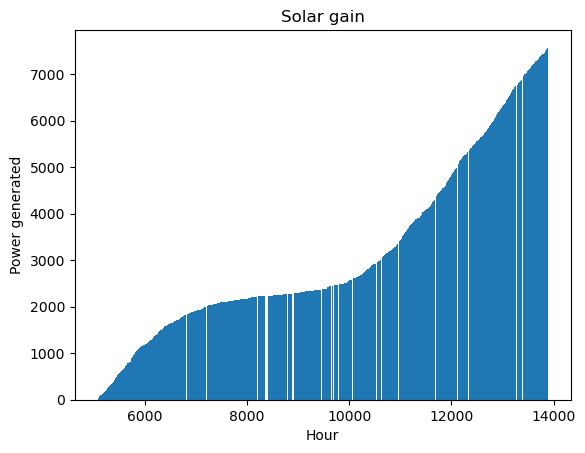

In [346]:
plt.bar(solgain_agg_fix.index.values,solgain_agg_fix.value.values, width=1)
plt.xlabel("Hour")
plt.ylabel("Power generated")
plt.title("Solar gain")
plt.show()

### map to 24h and fill in blanks

In [347]:
mindex=solgain_agg_fix.index.min()

In [348]:
maxdex=solgain_agg_fix.index.max()

In [349]:
def map_df_24h(df_in, mindex=1, maxdex=24):
    df_int=pd.DataFrame(index=range(mindex,maxdex+1), columns=df_in.columns)
    for indexer in range(mindex, maxdex+1):
        ind_sel=max(df_in.index.values[df_in.index.values<=indexer])
        for name in list(df_in.columns): #df_in[df_in.index.values==ind_sel].mean().iteritems():
            #print(name)
            values=df_in[name].iloc[df_in.index.values==ind_sel].max()
            df_int[name].loc[[indexer]]=values
    return df_int

In [350]:
solgain_agg_fix_int=map_df_24h(solgain_agg_fix, mindex,maxdex)

In [351]:
solgain_agg_fix_int.iloc[0:20]

,value
5064,0.0
5065,0.0
5066,0.0
5067,0.3
5068,1.6
5069,2.3
5070,5.1
5071,8.3
5072,11.7
5073,15.3


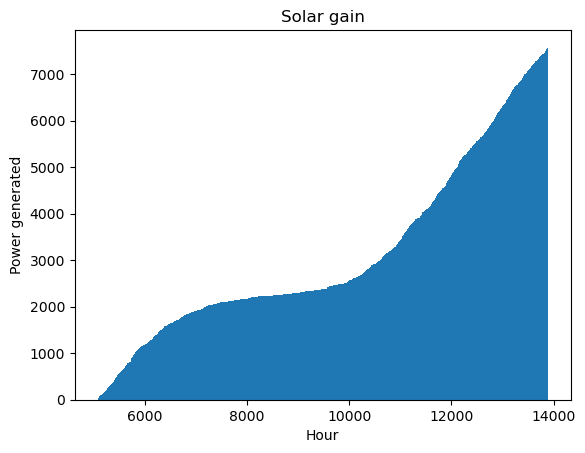

In [352]:
plt.bar(solgain_agg_fix_int.index.values,solgain_agg_fix_int.value.values, width=1)
plt.xlabel("Hour")
plt.ylabel("Power generated")
plt.title("Solar gain")
plt.show()

### differential for solar power

In [353]:
solgain_agg_fix_int_dv=solgain_agg_fix_int.diff()

In [354]:
solgain_agg_fix_int_dv.head(20)

,value
5064,NaN
5065,0.0
5066,0.0
5067,0.3
5068,1.3
5069,0.7
5070,2.8
5071,3.2
5072,3.4
5073,3.6


In [355]:
solgain_agg_fix_int_dv.value
solgain_agg_fix_int_dv.drop(mindex, inplace=True)

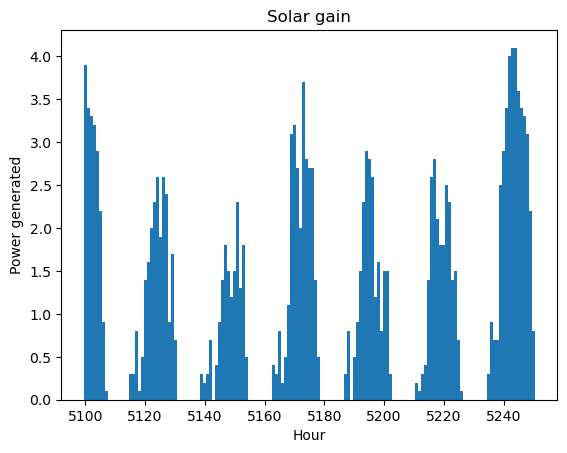

In [356]:
plt.bar(solgain_agg_fix_int_dv.loc[5100:5250].index.values,solgain_agg_fix_int_dv.loc[5100:5250].value.values, width=1)
plt.xlabel("Hour")
plt.ylabel("Power generated")
plt.title("Solar gain")
plt.show()

Solar gain is expected for the current hour (e.g for hour 8 it is what is expected to be produced between 8 and 8:59). Nota bene: Timezone is UTC!

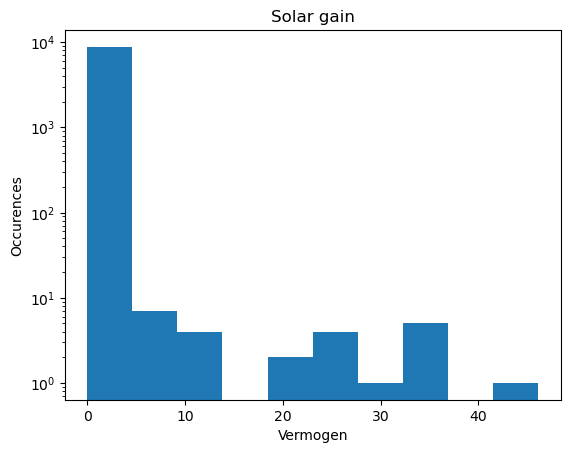

In [357]:
plt.hist(solgain_agg_fix_int_dv.value.values, log=True)
plt.xlabel("Vermogen")
plt.ylabel("Occurences")
plt.title("Solar gain")
plt.show()

In [358]:
solgain_agg_fix_int_dv[solgain_agg_fix_int_dv.value.values>4.5]

,value
5444,34.8
5610,22.3
5731,33.3
5755,29.1
6164,22.1
6258,12.1
6593,4.9
6808,5.3
8056,6.2
9040,5.4


In [359]:
solgain_agg_fix_int_dv.loc[5440:5450]

,value
5440,1.9
5441,0.6
5442,0.2
5443,0.0
5444,34.8
5445,0.0
5446,0.0
5447,0.0
5448,0.0
5449,0.0


In [360]:
np.sort(solgain_agg_fix_int_dv.value.values)[::-1]

array([46.100000000000364, 35.59999999999991, 34.80000000000018, ...,
       -4.547473508864641e-13, -4.547473508864641e-13,
       -9.094947017729282e-13], dtype=object)

In [361]:
solgain_agg_fix_int_dv=solgain_agg_fix_int_dv[solgain_agg_fix_int_dv.value.values<=4.5] #physically not possible to have more than 4.5 kWh

In [362]:
solgain_agg_fix_int.size

8832

### Get historical weather data

In [363]:
# first half of the roof
parameters_1 = {
    "latitude": 51.3225,
    "longitude": 4.9447,
    "start_date": '2024-07-29',
    "end_date": '2025-08-01',
    "tilt": 60,
    "azimuth": 77,
    "hourly": ['cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high' , 'soil_temperature_0_to_7cm', 'snow_depth', 'global_tilted_irradiance', 'is_day'],
}

In [364]:
# other half of the roof
parameters_2 = {
    "latitude": 51.3225,
    "longitude": 4.9447,
    "start_date": '2024-07-29',
    "end_date": '2025-08-01',
    "tilt": 60,
    "azimuth": -103,
    "hourly": ['global_tilted_irradiance'],
}

In [365]:
response = requests.get("https://archive-api.open-meteo.com/v1/archive",params=parameters_1)
weather_agg_int=pd.DataFrame(response.json()['hourly'])
response = requests.get("https://archive-api.open-meteo.com/v1/archive",params=parameters_2)
sndhalf=pd.DataFrame(response.json()['hourly'])

In [366]:
# combine (add up since same number of solar panels on each half)
weather_agg_int.global_tilted_irradiance=weather_agg_int.global_tilted_irradiance+sndhalf.global_tilted_irradiance

In [367]:
weather_agg_int.tail(50)

,time,cloud_cover_low,cloud_cover_mid,cloud_cover_high,soil_temperature_0_to_7cm,snow_depth,global_tilted_irradiance,is_day
8806,2025-07-30T22:00,14,100,0,16.6,NaN,0.0,0
8807,2025-07-30T23:00,96,97,95,16.3,NaN,0.0,0
8808,2025-07-31T00:00,2,38,80,16.2,NaN,0.0,0
8809,2025-07-31T01:00,18,91,86,16.7,NaN,0.0,0
8810,2025-07-31T02:00,18,57,99,16.5,NaN,0.0,0
8811,2025-07-31T03:00,100,91,91,16.4,NaN,0.0,0
8812,2025-07-31T04:00,35,100,28,16.2,NaN,0.0,0
8813,2025-07-31T05:00,39,85,0,16.0,NaN,31.4,1
8814,2025-07-31T06:00,28,15,0,16.1,NaN,86.4,1
8815,2025-07-31T07:00,0,17,0,16.8,NaN,490.3,1


In [368]:
weather_agg_int.size/8

8856.0

In [369]:
solgain_agg_fix_int_dv.size

8806

In [370]:
# date time and merge
weather_agg_int['time_']=weather_agg_int['time']
weather_agg_int['time'] = pd.to_datetime(weather_agg_int['time'])
weather_agg_int['time']=(weather_agg_int.time.dt.year-2024)*(365 + calendar.isleap(datetime.now().year-1))*24+weather_agg_int.time.dt.day_of_year*24+weather_agg_int.time.dt.hour
weather_agg_int.set_index('time', inplace=True)

In [371]:
weather_agg_int.index.unique()

Index([ 5064,  5065,  5066,  5067,  5068,  5069,  5070,  5071,  5072,  5073,
       ...
       13910, 13911, 13912, 13913, 13914, 13915, 13916, 13917, 13918, 13919],
      dtype='int32', name='time', length=8856)

In [372]:
solgain_agg_fix_int_dv.index

Index([ 5065,  5066,  5067,  5068,  5069,  5070,  5071,  5072,  5073,  5074,
       ...
       13886, 13887, 13888, 13889, 13890, 13891, 13892, 13893, 13894, 13895],
      dtype='int64', length=8806)

In [373]:
# make 2 versions at begin and end of interval
weather_agg_int_1=weather_agg_int.loc[solgain_agg_fix_int_dv.index]
weather_agg_int_2=weather_agg_int.loc[solgain_agg_fix_int_dv.index+1]
weather_agg_int_2.index=weather_agg_int_1.index

In [374]:
weather_agg_int_1.size/8

8806.0

In [375]:
solgain_agg_fix_int_dv.index

Index([ 5065,  5066,  5067,  5068,  5069,  5070,  5071,  5072,  5073,  5074,
       ...
       13886, 13887, 13888, 13889, 13890, 13891, 13892, 13893, 13894, 13895],
      dtype='int64', length=8806)

In [376]:
# precipitation and irradiation is preceeding hour, others are instant --> average over interval
weather_agg_int=weather_agg_int_2
weather_agg_int.time_=weather_agg_int_1.time_
weather_agg_int.cloud_cover_low=(weather_agg_int_1.cloud_cover_low+weather_agg_int_2.cloud_cover_low)/2
weather_agg_int.cloud_cover_mid=(weather_agg_int_1.cloud_cover_mid+weather_agg_int_2.cloud_cover_mid)/2
weather_agg_int.cloud_cover_high=(weather_agg_int_1.cloud_cover_high+weather_agg_int_2.cloud_cover_high)/2
weather_agg_int.soil_temperature_0_to_7cm=(weather_agg_int_1.soil_temperature_0_to_7cm+weather_agg_int_2.soil_temperature_0_to_7cm)/2
weather_agg_int.snow_depth=(weather_agg_int_1.snow_depth+weather_agg_int_2.snow_depth)/2

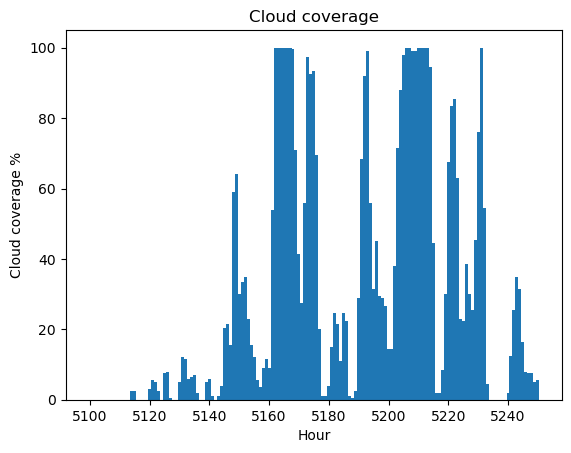

In [377]:
plt.bar(weather_agg_int.loc[5100:5250].index.values,weather_agg_int.loc[5100:5250].cloud_cover_low.values, width=1)
plt.xlabel("Hour")
plt.ylabel("Cloud coverage %")
plt.title("Cloud coverage")
plt.show()

In [378]:
# eliminate NaNs and negative snow depths
weather_agg_int.snow_depth[weather_agg_int.snow_depth<0]=0
weather_agg_int.snow_depth[np.isnan(weather_agg_int.snow_depth)]=0

C:\Users\MarcH\AppData\Local\Temp\ipykernel_72004\3498296554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_agg_int.snow_depth[weather_agg_int.snow_depth<0]=0
C:\Users\MarcH\AppData\Local\Temp\ipykernel_72004\3498296554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_agg_int.snow_depth[np.isnan(weather_agg_int.snow_depth)]=0


In [379]:
weather_agg_int.snow_depth[np.isnan(weather_agg_int.snow_depth)]
sum(np.isnan(weather_agg_int.snow_depth))

0

In [380]:
weather_agg_int.tail(50)

,cloud_cover_low,cloud_cover_mid,cloud_cover_high,soil_temperature_0_to_7cm,snow_depth,global_tilted_irradiance,is_day,time_
13846,20.0,19.0,9.0,16.35,0.0,0.0,0,2025-07-29T22:00
13847,25.0,64.5,0.5,15.75,0.0,0.0,0,2025-07-29T23:00
13848,24.5,96.5,11.5,15.40,0.0,0.0,0,2025-07-30T00:00
13849,15.5,96.5,14.0,15.25,0.0,0.0,0,2025-07-30T01:00
13850,8.0,77.5,2.5,15.15,0.0,0.0,0,2025-07-30T02:00
13851,17.5,41.0,0.0,15.00,0.0,0.0,0,2025-07-30T03:00
13852,37.0,20.5,0.0,14.85,0.0,86.4,1,2025-07-30T04:00
13853,37.5,12.5,0.0,15.05,0.0,320.0,1,2025-07-30T05:00
13854,25.5,15.5,0.0,15.80,0.0,575.8,1,2025-07-30T06:00
13855,37.5,17.5,5.5,16.75,0.0,657.1,1,2025-07-30T07:00


In [381]:
solgain_agg_fix_int_dv.tail(50)

,value
13846,0.0
13847,0.0
13848,0.0
13849,0.0
13850,0.0
13851,0.2
13852,0.9
13853,0.6
13854,1.7
13855,1.8


In [382]:
solgain_agg_fix_int_dv.size

8806

In [383]:
weather_agg_int.size/8

8806.0

quick check how cloudcover correlates with indirect radiance

In [384]:
weather_agg_int.loc[5101].cloud_cover_low

0.0

In [385]:
weather_agg_int.loc[5125].cloud_cover_low

7.5

In [386]:
weather_agg_int.loc[5101].global_tilted_irradiance

899.5999999999999

In [387]:
weather_agg_int.loc[5125].global_tilted_irradiance

817.5

In [388]:
weather_agg_int.loc[5101].time_

'2024-07-30T13:00'

In [389]:
weather_agg_int.loc[5125].time_

'2024-07-31T13:00'

### Remove night data to better balance

In [390]:
index_night=weather_agg_int.is_day>0

In [391]:
index_night

5065     False
5066     False
5067     False
5068      True
5069      True
         ...  
13891    False
13892    False
13893    False
13894    False
13895    False
Name: is_day, Length: 8806, dtype: bool

In [392]:
weather_agg_int=weather_agg_int.loc[index_night]

In [393]:
solgain_agg_fix_int_dv=solgain_agg_fix_int_dv.loc[index_night]

In [394]:
index_pos=(solgain_agg_fix_int_dv.value>0.01) & (solgain_agg_fix_int_dv.value<=4.5)

In [395]:
weather_agg_int=weather_agg_int.loc[index_pos]

In [396]:
solgain_agg_fix_int_dv=solgain_agg_fix_int_dv.loc[index_pos]

In [397]:
solgain_agg_fix_int_dv.value.min()

0.0999999999994543

## Prepare ML pipeline

### Load functions

In [398]:
#!pip install xgboost
#!pip install sklearn
!pip3 install scikit-learn==1.5.2
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
#import xgboost
from scipy import stats

ERROR: Ignored the following versions that require a different python version: 1.4.0 Requires-Python >=3.9; 1.4.0rc1 Requires-Python >=3.9; 1.4.1.post1 Requires-Python >=3.9; 1.4.2 Requires-Python >=3.9; 1.5.0 Requires-Python >=3.9; 1.5.0rc1 Requires-Python >=3.9; 1.5.1 Requires-Python >=3.9; 1.5.2 Requires-Python >=3.9; 1.6.0 Requires-Python >=3.9; 1.6.0rc1 Requires-Python >=3.9; 1.6.1 Requires-Python >=3.9; 1.7.0 Requires-Python >=3.10; 1.7.0rc1 Requires-Python >=3.10; 1.7.1 Requires-Python >=3.10
ERROR: Could not find a version that satisfies the requirement scikit-learn==1.5.2 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21.1, 0.21.2, 0.21.3, 0.22, 0.22.1, 0.22.2, 0.22.2.post1, 0.23.0, 0.23.1, 0.23.2, 0.24.0, 0.24.1, 0.24.2, 1.0, 1.0.1, 1.0.2, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.2.0rc1, 1.2.0, 1.2.1, 1.2.2, 1.3.0rc1, 1

### combine dataframes

In [399]:
weather_agg_int.drop('time_', axis=1,inplace=True)

In [400]:
data_comb=solgain_agg_fix_int_dv.join(weather_agg_int)

In [401]:
data_comb = data_comb.astype(float)

In [402]:
data_comb=data_comb.drop(['is_day', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high'], axis=1)

In [403]:
data_comb

,value,soil_temperature_0_to_7cm,snow_depth,global_tilted_irradiance
5068,1.3,15.65,0.0,143.0
5069,0.7,15.95,0.0,523.7
5070,2.8,16.90,0.0,753.5
5071,3.2,18.25,0.0,869.3
5072,3.4,19.80,0.0,894.9
...,...,...,...,...
13886,0.7,20.70,0.0,341.7
13887,0.6,19.80,0.0,217.6
13888,0.4,19.35,0.0,391.8
13889,0.2,19.15,0.0,150.8


### Add polynomial

In [404]:
#data_comb['global_tilted_irradiance_2']=data_comb.global_tilted_irradiance**2
#data_comb['global_tilted_irradiance_3']=data_comb.global_tilted_irradiance**3
#data_comb['soil_temperature_0_to_7cm_2']=data_comb.soil_temperature_0_to_7cm**2
#data_comb['soil_temperature_0_to_7cm_3']=data_comb.soil_temperature_0_to_7cm**3
#data_comb['snow_depth_2']=data_comb.snow_depth**2
#data_comb['snow_depth_3']=data_comb.snow_depth**3

### Calculate weights

In [405]:
counts, bin_edges = np.histogram(data_comb.value, bins=10)

In [406]:
counts

array([1074,  636,  503,  298,  307,  392,  399,  410,  160,   79],
      dtype=int64)

In [407]:
bin_edges

array([0.1 , 0.54, 0.98, 1.42, 1.86, 2.3 , 2.74, 3.18, 3.62, 4.06, 4.5 ])

In [408]:
bin_indices = np.digitize(data_comb.value, bin_edges, right=True)
weights = np.array([1 / counts[i - 1] if counts[i - 1] > 0 else 0 for i in bin_indices])

In [409]:
weights

array([0.00198807, 0.00157233, 0.00250627, ..., 0.0009311 , 0.0009311 ,
       0.01265823])

In [410]:
data_comb['weights']=weights

### split train and test set

In [411]:
train_set, test_set = train_test_split(data_comb, test_size=0.3, random_state=42)

### look for correlations

In [412]:
corr_matrix = data_comb.corr()

In [413]:
corr_matrix

,value,soil_temperature_0_to_7cm,snow_depth,global_tilted_irradiance,weights
value,1.000000,0.495553,-0.118823,0.872923,0.638595
soil_temperature_0_to_7cm,0.495553,1.000000,-0.220832,0.499100,0.346301
snow_depth,-0.118823,-0.220832,1.000000,-0.098409,-0.075674
global_tilted_irradiance,0.872923,0.499100,-0.098409,1.000000,0.533857
weights,0.638595,0.346301,-0.075674,0.533857,1.000000


array([[<Axes: xlabel='value', ylabel='value'>,
        <Axes: xlabel='soil_temperature_0_to_7cm', ylabel='value'>,
        <Axes: xlabel='snow_depth', ylabel='value'>,
        <Axes: xlabel='global_tilted_irradiance', ylabel='value'>,
        <Axes: xlabel='weights', ylabel='value'>],
       [<Axes: xlabel='value', ylabel='soil_temperature_0_to_7cm'>,
        <Axes: xlabel='soil_temperature_0_to_7cm', ylabel='soil_temperature_0_to_7cm'>,
        <Axes: xlabel='snow_depth', ylabel='soil_temperature_0_to_7cm'>,
        <Axes: xlabel='global_tilted_irradiance', ylabel='soil_temperature_0_to_7cm'>,
        <Axes: xlabel='weights', ylabel='soil_temperature_0_to_7cm'>],
       [<Axes: xlabel='value', ylabel='snow_depth'>,
        <Axes: xlabel='soil_temperature_0_to_7cm', ylabel='snow_depth'>,
        <Axes: xlabel='snow_depth', ylabel='snow_depth'>,
        <Axes: xlabel='global_tilted_irradiance', ylabel='snow_depth'>,
        <Axes: xlabel='weights', ylabel='snow_depth'>],
       [<Axes:

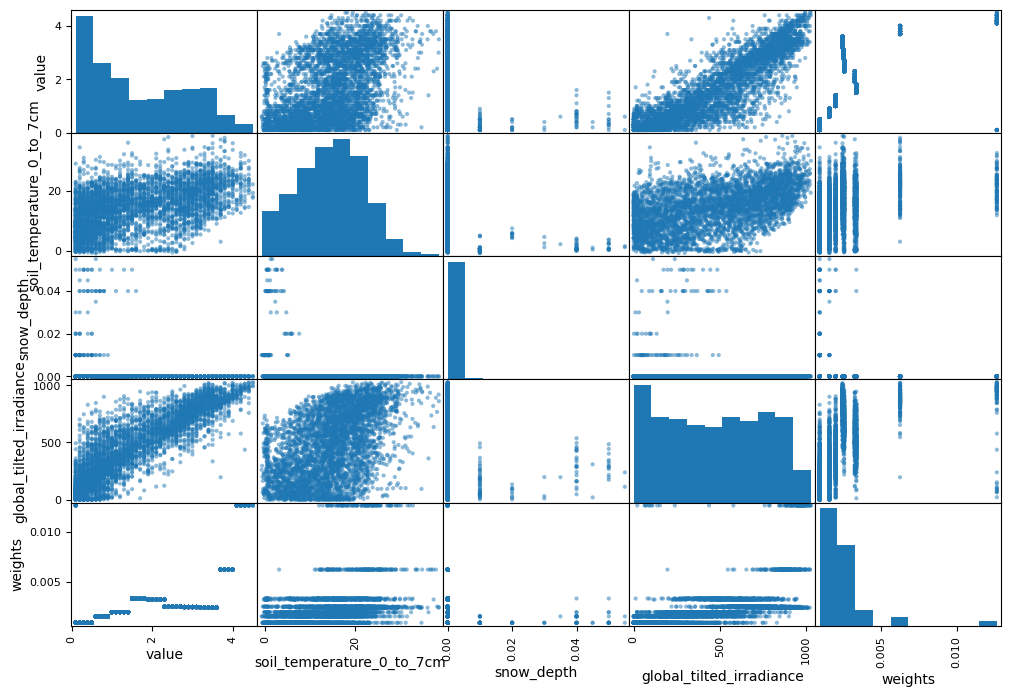

In [414]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_comb, figsize=(12,8))

### feature scaling

In [415]:
variables=train_set.drop(['value', 'weights'], axis=1)
variables_test=test_set.drop(['value', 'weights'], axis=1)
outcome=train_set["value"].copy()
outcome_test=test_set["value"].copy()
wghts=train_set["weights"].copy()
wghts_test=test_set["weights"].copy()

In [416]:
outcome

5703     1.0
13170    1.4
13876    0.4
13191    2.8
11508    1.1
        ... 
12675    0.5
5849     0.1
12125    1.5
13160    3.3
6629     0.4
Name: value, Length: 2980, dtype: float64

In [417]:
scale=StandardScaler()
variables_sc=pd.DataFrame(scale.fit_transform(variables),columns=variables.columns,index=variables.index)
variables_test_sc=pd.DataFrame(scale.transform(variables_test),columns=variables_test.columns,index=variables_test.index)

In [418]:
variables_test_sc

,soil_temperature_0_to_7cm,snow_depth,global_tilted_irradiance
5366,1.371281,-0.136102,1.073120
6971,0.233692,-0.136102,-0.424362
11847,0.144604,-0.136102,0.338771
12921,1.528898,-0.136102,1.502489
6105,0.329633,-0.136102,0.504282
...,...,...,...
9469,-0.917602,-0.136102,-0.936316
11405,-1.088926,-0.136102,-0.444922
10931,-0.499573,-0.136102,0.337743
6677,-0.951867,-0.136102,-1.603157


### linear model

In [419]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

In [420]:
param_grid = [
    {'penalty':  ['elasticnet'], 'alpha': [0.000001, 0.000005, 0.00001, 0.0005, 0.0001, 0.0005, 0.001, 0.005, 0.01], 'l1_ratio': [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35,0.4,0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1], 'max_iter': [10000], 'learning_rate': ['optimal']},
    {'penalty':  ['l1'], 'alpha': [0.000001, 0.000005, 0.00001, 0.0005, 0.0001, 0.0005, 0.001, 0.005, 0.01], 'max_iter': [10000], 'learning_rate': ['optimal']},
    {'penalty':  ['l2'], 'alpha': [0.000001, 0.000005, 0.00001, 0.0005, 0.0001, 0.0005, 0.001, 0.005, 0.01], 'max_iter': [10000], 'learning_rate': ['optimal']}
]
sgd_reg = SGDRegressor()
grid_search = GridSearchCV(sgd_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(variables_sc, outcome, sample_weight=wghts)

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid=[{'alpha': [1e-06, 5e-06, 1e-05, 0.0005, 0.0001, 0.0005,
                                    0.001, 0.005, 0.01],
                          'l1_ratio': [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35,
                                       0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7,
                                       0.75, 0.8, 0.85, 0.9, 0.95, 1],
                          'learning_rate': ['optimal'], 'max_iter': [10000],
                          'penalty': ['elasticnet']},
                         {'alpha': [1e-06, 5e-06, 1e-05, 0.0005, 0.0001, 0.0005,
                                    0.001, 0.005, 0.01],
                          'learning_rate': ['optimal'], 'max_iter': [10000],
                          'penalty': ['l1']},
                         {'alpha': [1e-06, 5e-06, 1e-05, 0.0005, 0.0001, 0.0005,
                                    0.001, 0.005, 0.01],
                          'learning_rate': ['optimal'], 'max_iter': [10000],
                          'penalty': ['l2']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [421]:
grid_search.best_params_

{'alpha': 1e-05,
 'l1_ratio': 0.65,
 'learning_rate': 'optimal',
 'max_iter': 10000,
 'penalty': 'elasticnet'}

In [422]:
sgd_reg_best=grid_search.best_estimator_
#sgd_reg_best=SGDRegressor(penalty='elasticnet', alpha=0.00001, max_iter=10000, learning_rate='optimal', l1_ratio=0.65)
sgd_reg_best.fit(variables_sc,outcome, sample_weight=wghts)

SGDRegressor(alpha=1e-05, l1_ratio=0.65, learning_rate='optimal',
             max_iter=10000, penalty='elasticnet')

In [423]:
predictions=sgd_reg_best.predict(variables_test_sc)
predictions[predictions<0]=0
predictions[predictions>4.5]=4.5
sgd_mse=mean_squared_error(predictions, outcome_test)
sgd_rmse=np.sqrt(sgd_mse)
sgd_rmse

0.6238605755110538

In [424]:
confidence = 0.95
squared_errors = (predictions-outcome_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([0.58966383, 0.65627784])

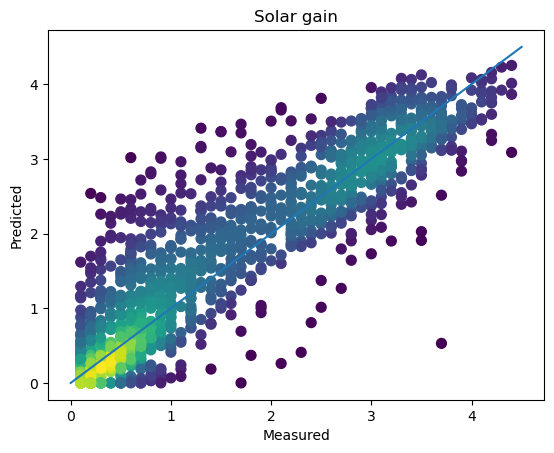

In [425]:
from scipy.stats import gaussian_kde
x=outcome_test
y=predictions
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
#idx = z.argsort()
#x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
ax.plot([0, 4.5], [0, 4.5])
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.title("Solar gain")
plt.show()

In [426]:
r2_score(outcome_test, predictions)

0.738101168671594

In [427]:
sgd_reg_best.feature_names_in_

array(['soil_temperature_0_to_7cm', 'snow_depth',
       'global_tilted_irradiance'], dtype=object)

In [428]:
sgd_reg_best.coef_

array([ 0.11453152, -0.01885934,  1.15820379])

In [429]:
sgd_reg_best.feature_names_in_[sgd_reg_best.coef_>0]

array(['soil_temperature_0_to_7cm', 'global_tilted_irradiance'],
      dtype=object)

### Figure out outliers

In [430]:
(predictions - outcome_test) >2

5366     False
6971     False
11847    False
12921    False
6105     False
         ...  
9469     False
11405    False
10931    False
6677     False
7161     False
Name: value, Length: 1278, dtype: bool

In [431]:
# get outliers
variables_test_sc.loc[(predictions - outcome_test) >1.5].index

Index([ 6135, 13311,  7333, 13783, 10881,  6391, 12276, 13447, 13424, 13695,
       11455, 11862, 13402,  6926, 13718,  7453,  6396,  5292,  5191, 13301,
       11272,  5814, 13786, 12655, 13422, 13709, 13736,  5457,  7334, 13734,
       13446, 12078, 12917,  9230, 13787, 12755, 13597,  6297, 10520, 12631],
      dtype='int64')

In [432]:
weather_agg_int_1.loc[variables_test_sc.loc[(predictions - outcome_test) >1.5].index]

,cloud_cover_low,cloud_cover_mid,cloud_cover_high,soil_temperature_0_to_7cm,snow_depth,global_tilted_irradiance,is_day,time_
6135,18,32,0,15.5,0.00,697.9,1,2024-09-11T15:00
13311,9,13,0,20.6,0.00,947.5,1,2025-07-07T15:00
7333,0,0,0,14.9,0.00,552.9,1,2024-10-31T13:00
13783,31,33,100,17.5,0.00,596.9,1,2025-07-27T07:00
10881,59,0,0,6.8,0.00,575.9,1,2025-03-28T09:00
6391,0,81,4,14.7,0.00,347.0,1,2024-09-22T07:00
12276,47,80,0,17.8,0.00,892.4,1,2025-05-25T12:00
13447,46,24,0,18.9,0.00,579.8,1,2025-07-13T07:00
13424,65,0,0,19.7,0.00,845.4,1,2025-07-12T08:00
13695,8,22,2,20.9,0.00,707.6,1,2025-07-23T15:00


In [433]:
weather_agg_int_1.time_

5065     2024-07-29T01:00
5066     2024-07-29T02:00
5067     2024-07-29T03:00
5068     2024-07-29T04:00
5069     2024-07-29T05:00
               ...       
13891    2025-07-31T19:00
13892    2025-07-31T20:00
13893    2025-07-31T21:00
13894    2025-07-31T22:00
13895    2025-07-31T23:00
Name: time_, Length: 8806, dtype: object

### fit decision tree regressor

In [683]:
param_grid = [
    {'bootstrap': [True], 'n_estimators': [10, 50, 100, 200, 300], 'max_features': [1, 2, 3, 4, 5, 6, 7], 'max_leaf_nodes': [64, 128, 256], 'n_jobs':[-1]},
    {'bootstrap': [False], 'n_estimators': [10, 50, 100, 200, 300], 'max_features': [1, 2, 3, 4, 5, 6, 7], 'max_leaf_nodes': [64, 128, 256], 'n_jobs': [-1]},
]
forest_reg=RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(variables_sc, outcome)
#forest_reg.fit(variables_sc, outcome)

C:\Users\Gebruiker\anaconda3\envs\datascience2\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True],
                          'max_features': [1, 2, 3, 4, 5, 6, 7],
                          'max_leaf_nodes': [64, 128, 256],
                          'n_estimators': [10, 50, 100, 200, 300],
                          'n_jobs': [-1]},
                         {'bootstrap': [False],
                          'max_features': [1, 2, 3, 4, 5, 6, 7],
                          'max_leaf_nodes': [64, 128, 256],
                          'n_estimators': [10, 50, 100, 200, 300],
                          'n_jobs': [-1]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [684]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 2,
 'max_leaf_nodes': 64,
 'n_estimators': 300,
 'n_jobs': -1}

In [685]:
forest_reg_best=grid_search.best_estimator_
#forest_reg_best=RandomForestRegressor(bootstrap=True, max_features = 3 , max_leaf_nodes = 256, n_estimators=50, n_jobs=-1)
forest_reg_best.fit(variables_sc,outcome)

RandomForestRegressor(max_features=2, max_leaf_nodes=64, n_estimators=300,
                      n_jobs=-1)

In [835]:
predictions=forest_reg_best.predict(variables_test_sc)
#predictions[predictions<0]=0
forest_mse=mean_squared_error(predictions, outcome_test)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

0.5909353219651104

In [836]:
confidence = 0.95
squared_errors = (predictions-outcome_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([0.55706507, 0.62296679])

In [837]:
predictions[32]

0.7199528944418381

In [838]:
outcome_test.iloc[32]

0.7000000000000455

In [839]:
predictions.min()

0.30096200087087727

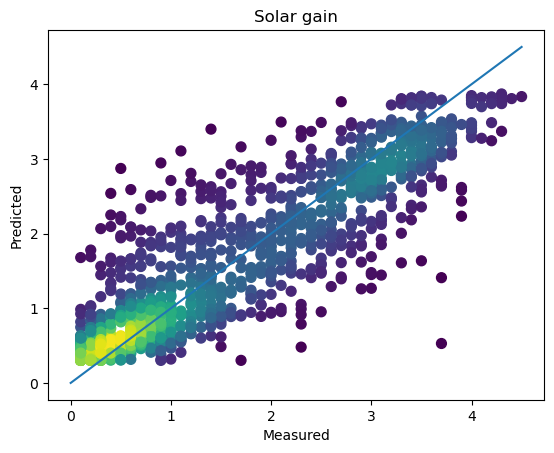

In [840]:
from scipy.stats import gaussian_kde
x=outcome_test
y=predictions
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
#idx = z.argsort()
#x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
ax.plot([0, 4.5], [0, 4.5])
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.title("Solar gain")
plt.show()

In [841]:
r2_score(outcome_test, predictions)

0.7535689808389748

In [834]:
feature_importances=forest_reg_best.feature_importances_
sorted(zip(variables_sc.columns, feature_importances), reverse=True)

[('soil_temperature_0_to_7cm', 0.1337798380306554),
 ('snow_depth', 0.0006138188061054032),
 ('global_tilted_irradiance', 0.8656063431632391)]

## Forecast via API

### Final model

In [758]:
sgd_reg_best=SGDRegressor(penalty='elasticnet', alpha=0.00001, max_iter=10000, learning_rate='optimal', l1_ratio=0.65)
sgd_reg_best.fit(variables_sc,outcome)

SGDRegressor(alpha=1e-05, l1_ratio=0.65, learning_rate='optimal',
             max_iter=10000, penalty='elasticnet')

In [782]:
scale=StandardScaler()
scale.fit(variables)

StandardScaler()

deploy model

In [783]:
from joblib import dump , load

## dump your model
sol_pred_mod = dump(sgd_reg_best, 'sol_pred_mod_sgd.gz')
weather_scl = dump(scale, 'weather_scl_sgd.gz')

In [784]:
sol_pred_mod 

['sol_pred_mod_sgd.gz']

In [785]:
weather_scl

['weather_scl_sgd.gz']

### Weather forecast

In [786]:
parameters = {
    "latitude": 51.3225,
    "longitude": 4.9447,
    "tilt": 60,
    "azimuth": 77,
    "hourly": ['soil_temperature_0cm', 'snow_depth', 'global_tilted_irradiance', 'is_day'],
}

In [787]:
parameters_2 = {
    "latitude": 51.3225,
    "longitude": 4.9447,
    "tilt": 60,
    "azimuth": -103,
    "hourly": ['global_tilted_irradiance'],
}

In [788]:
response = requests.get("https://api.open-meteo.com/v1/forecast",params=parameters)
weather_fc_int=pd.DataFrame(response.json()['hourly'])

In [789]:
response_roof2 = requests.get("https://api.open-meteo.com/v1/forecast",params=parameters)
weather_fc_int_roof2=pd.DataFrame(response.json()['hourly'])

In [790]:
# merge
weather_fc_int.global_tilted_irradiance=weather_fc_int.global_tilted_irradiance+weather_fc_int_roof2.global_tilted_irradiance

In [791]:
test={"parameters":parameters}
print(test["parameters"])

{'latitude': 51.3225, 'longitude': 4.9447, 'tilt': 60, 'azimuth': 77, 'hourly': ['soil_temperature_0cm', 'snow_depth', 'global_tilted_irradiance', 'is_day']}


In [792]:
weather_fc_int['time_']=weather_fc_int['time']
weather_fc_int['time'] = pd.to_datetime(weather_fc_int['time'])
weather_fc_int.time.dt.year

0      2025
1      2025
2      2025
3      2025
4      2025
       ... 
163    2025
164    2025
165    2025
166    2025
167    2025
Name: time, Length: 168, dtype: int32

In [793]:
def days_in_year(year=datetime.now().year):
    return 365 + calendar.isleap(year)
days_in_year(year=2023)

365

In [794]:
# date time and merge
weather_fc_int['time_']=weather_fc_int['time']
weather_fc_int['time'] = pd.to_datetime(weather_fc_int['time'])
weather_fc_int['time']=(weather_fc_int.time.dt.year-2023)*days_in_year()*24+weather_fc_int.time.dt.day_of_year*24+weather_fc_int.time.dt.hour
weather_fc_int.set_index('time', inplace=True)

In [795]:
weather_fc_int.index

Index([22680, 22681, 22682, 22683, 22684, 22685, 22686, 22687, 22688, 22689,
       ...
       22838, 22839, 22840, 22841, 22842, 22843, 22844, 22845, 22846, 22847],
      dtype='int32', name='time', length=168)

In [796]:
weather_fc_int.columns

Index(['soil_temperature_0cm', 'snow_depth', 'global_tilted_irradiance',
       'is_day', 'time_'],
      dtype='object')

In [797]:
weather_fc_int.columns=['soil_temperature_0_to_7cm', 'snow_depth', 'global_tilted_irradiance',
       'is_day', 'time_']

In [798]:
weather_fc_int.columns

Index(['soil_temperature_0_to_7cm', 'snow_depth', 'global_tilted_irradiance',
       'is_day', 'time_'],
      dtype='object')

In [799]:
# make 2 versions at begin and end of interval
weather_fc_int_1=weather_fc_int.loc[weather_fc_int.index[:-1]]
weather_fc_int_2=weather_fc_int.loc[weather_fc_int.index[:-1]+1]
weather_fc_int_2.index=weather_fc_int.index[:-1]

In [800]:
# precipitation and irradiance is preceeding hour, others are instant --> average over interval
weather_fc_int=weather_fc_int_2
weather_fc_int.time_=weather_fc_int_1.time_
#weather_fc_int.cloud_cover_high=(weather_fc_int_1.cloud_cover_high+weather_fc_int_2.cloud_cover_high)/2
#weather_fc_int.cloud_cover_low=(weather_fc_int_1.cloud_cover_low+weather_fc_int_2.cloud_cover_low)/2
#weather_fc_int.cloud_cover_mid=(weather_fc_int_1.cloud_cover_mid+weather_fc_int_2.cloud_cover_mid)/2
weather_fc_int.soil_temperature_0_to_7cm=(weather_fc_int_1.soil_temperature_0_to_7cm+weather_fc_int_2.soil_temperature_0_to_7cm)/2
weather_fc_int.snow_depth=(weather_fc_int_1.snow_depth+weather_fc_int_2.snow_depth)/2

In [801]:
weather_fc_int.snow_depth

time
22680    0.0
22681    0.0
22682    0.0
22683    0.0
22684    0.0
        ... 
22842    0.0
22843    0.0
22844    0.0
22845    0.0
22846    0.0
Name: snow_depth, Length: 167, dtype: float64

### Merge and prep

In [802]:
weather_fc_int.drop('time_', axis=1,inplace=True)

In [803]:
data_fc_comb=weather_fc_int

In [804]:
data_fc_comb = data_fc_comb.astype(float)

In [805]:
data_fc_comb_sc=pd.DataFrame(scale.transform(data_fc_comb.drop(['is_day'], axis=1)),columns=data_fc_comb.drop(['is_day'], axis=1).columns,index=data_fc_comb.index)

### Predict

In [806]:
data_fc_comb_sc[data_fc_comb.is_day>0]

,soil_temperature_0_to_7cm,snow_depth,global_tilted_irradiance
time,,,
22684,-0.247268,-0.128871,-1.699729
22685,-0.085312,-0.128871,-1.318269
22686,0.150875,-0.128871,-1.024062
22687,0.468040,-0.128871,-0.829366
22688,0.785205,-0.128871,-0.672889
...,...,...,...
22838,1.412786,-0.128871,2.344897
22839,1.291319,-0.128871,1.822103
22840,1.136111,-0.128871,0.969768


In [807]:
predictions=sgd_reg_best.predict(data_fc_comb_sc[data_fc_comb.is_day>0])

In [808]:
predictions

array([ 3.16501591e-02,  4.61132373e-01,  8.02689710e-01,  1.04362798e+00,
        1.24304056e+00,  1.47349853e+00,  2.75528163e+00,  3.75266730e+00,
        3.63811765e+00,  2.92185162e+00,  3.82431108e+00,  3.06041664e+00,
        9.16305233e-01,  6.93344512e-01,  8.06662583e-02,  8.21540293e-02,
        4.31122204e-01,  7.56578100e-01,  1.04426052e+00,  7.14534971e-01,
        8.12429878e-01,  2.15529757e+00,  2.02894516e+00,  2.72733439e+00,
        4.59599035e+00,  5.91918404e+00,  1.57467841e+00,  5.69472053e-01,
        1.58944886e-01,  1.08196809e-01,  4.51855728e-02,  4.49480574e-01,
        7.98908809e-01,  1.12966958e+00,  1.37094563e+00,  1.35209851e+00,
        2.88129626e+00,  4.35268005e+00,  5.09542707e+00,  6.06306111e+00,
        6.31866292e+00,  5.83496083e+00,  4.48095161e+00,  2.26337051e+00,
        4.55094544e-01,  1.03517735e-02,  3.68995226e-01,  7.84352858e-01,
        1.10615013e+00,  1.37952831e+00,  1.65057033e+00,  2.72330895e+00,
        3.35808344e+00,  

In [809]:
data_fc_comb.index

Index([22680, 22681, 22682, 22683, 22684, 22685, 22686, 22687, 22688, 22689,
       ...
       22837, 22838, 22839, 22840, 22841, 22842, 22843, 22844, 22845, 22846],
      dtype='int32', name='time', length=167)

In [810]:
df_fc=pd.DataFrame(0, columns=['Time','ForeCast'], index=data_fc_comb.index)

In [811]:
df_fc.ForeCast[data_fc_comb.is_day>0]=predictions

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_4844\2904327405.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_fc.ForeCast[data_fc_comb.is_day>0]=predictions
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_4844\2904327405.py:1: Futur

In [812]:
df_fc.Time=weather_fc_int_1.time_

In [813]:
df_fc.head(48)

,Time,ForeCast
time,,
22680,2025-08-03 00:00:00,0.000000
22681,2025-08-03 01:00:00,0.000000
22682,2025-08-03 02:00:00,0.000000
22683,2025-08-03 03:00:00,0.000000
22684,2025-08-03 04:00:00,0.031650
22685,2025-08-03 05:00:00,0.461132
22686,2025-08-03 06:00:00,0.802690
22687,2025-08-03 07:00:00,1.043628
22688,2025-08-03 08:00:00,1.243041


In [814]:
list(df_fc.Time.dt.strftime('%Y-%m-%dT%H:%M:%S%z+00:00').values)

['2025-08-03T00:00:00+00:00',
 '2025-08-03T01:00:00+00:00',
 '2025-08-03T02:00:00+00:00',
 '2025-08-03T03:00:00+00:00',
 '2025-08-03T04:00:00+00:00',
 '2025-08-03T05:00:00+00:00',
 '2025-08-03T06:00:00+00:00',
 '2025-08-03T07:00:00+00:00',
 '2025-08-03T08:00:00+00:00',
 '2025-08-03T09:00:00+00:00',
 '2025-08-03T10:00:00+00:00',
 '2025-08-03T11:00:00+00:00',
 '2025-08-03T12:00:00+00:00',
 '2025-08-03T13:00:00+00:00',
 '2025-08-03T14:00:00+00:00',
 '2025-08-03T15:00:00+00:00',
 '2025-08-03T16:00:00+00:00',
 '2025-08-03T17:00:00+00:00',
 '2025-08-03T18:00:00+00:00',
 '2025-08-03T19:00:00+00:00',
 '2025-08-03T20:00:00+00:00',
 '2025-08-03T21:00:00+00:00',
 '2025-08-03T22:00:00+00:00',
 '2025-08-03T23:00:00+00:00',
 '2025-08-04T00:00:00+00:00',
 '2025-08-04T01:00:00+00:00',
 '2025-08-04T02:00:00+00:00',
 '2025-08-04T03:00:00+00:00',
 '2025-08-04T04:00:00+00:00',
 '2025-08-04T05:00:00+00:00',
 '2025-08-04T06:00:00+00:00',
 '2025-08-04T07:00:00+00:00',
 '2025-08-04T08:00:00+00:00',
 '2025-08-

In [815]:
["2023-12-29T09:00:00+00:00", "2023-12-29T10:00:00+00:00", "2023-12-30T12:00:00+00:00"]

['2023-12-29T09:00:00+00:00',
 '2023-12-29T10:00:00+00:00',
 '2023-12-30T12:00:00+00:00']

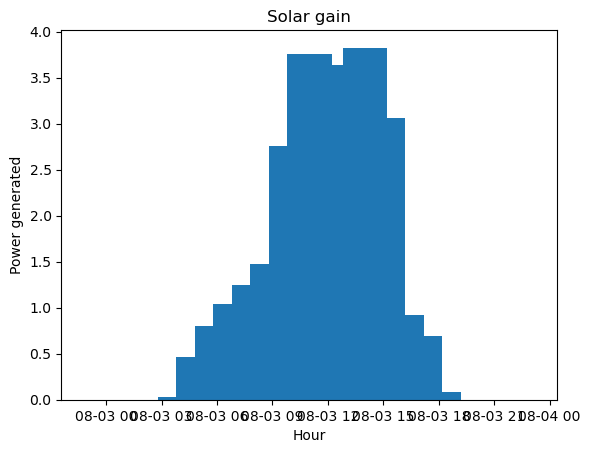

In [816]:
plt.bar(df_fc.Time.iloc[0:23].values,df_fc.ForeCast.iloc[0:23].values, width=0.1)
#plt.xticks(range(0, np.size(df_fc.ForeCast.iloc[0:23].values), 1), rotation=90)
plt.xlabel("Hour")
plt.ylabel("Power generated")
plt.title("Solar gain")
plt.show()

In [817]:
df_fc.iloc[0:23]

,Time,ForeCast
time,,
22680,2025-08-03 00:00:00,0.000000
22681,2025-08-03 01:00:00,0.000000
22682,2025-08-03 02:00:00,0.000000
22683,2025-08-03 03:00:00,0.000000
22684,2025-08-03 04:00:00,0.031650
22685,2025-08-03 05:00:00,0.461132
22686,2025-08-03 06:00:00,0.802690
22687,2025-08-03 07:00:00,1.043628
22688,2025-08-03 08:00:00,1.243041


In [818]:
sum(df_fc.ForeCast.iloc[0:23].values)

26.698601225493018

In [819]:
sum(df_fc.ForeCast.iloc[24:47].values)

23.679123367893286